In [3]:
import pandas as pd
import numpy as np

path = "//home/font/Data/MM/neepu/"
filename_sanya = '三亚.csv'
filename_haikou = '海口.csv'
data_sanya = pd.read_csv((path+filename_sanya),index_col='Time')
data_haikou = pd.read_csv((path+filename_haikou),index_col='Time')
# mmercial housing sold = CHS,Consumer price index = CPI,Gross production = GP,housing price =HP
columns = ['Total_pop','PCDI(city)','PCDI(countryside)','CHS','Total_inv','CPI','GP','Balance','HP']

print(data_sanya.columns)
data_sanya.columns =columns
data_sanya.index = pd.to_datetime(data_sanya.index)

data_haikou.columns =columns
data_haikou.index = pd.to_datetime(data_haikou.index)

Index(['年末人口(万)', '人均可支配收入(城镇)', '人均可支配收入(农村)', '商品房销售面积(平方米)',
       '房地产开发投资总额(万元)', '居民消费价格指数', '生产总值(亿元)', '储蓄存款余额(亿元)', '商品房价格(万元)'],
      dtype='object')


In [10]:
from sklearn.preprocessing import StandardScaler
def StandardScalerData(DataFrame):
    scaler = StandardScaler()
    scaler.fit(DataFrame)
    returnData = pd.DataFrame(scaler.transform(DataFrame))
    returnData.columns = columns
    return returnData

In [11]:
data_sanya = StandardScalerData(data_sanya)
data_haikou = StandardScalerData(data_haikou)

In [36]:
def Ridge(*data):
    from sklearn import linear_model
    X_train,X_test,y_train,y_test,alpha=data
    regr = linear_model.Ridge(alpha=alpha)
    regr.fit(X_train, y_train)
    print('Coefficients:%s, intercept %.2f'%(regr.coef_,regr.intercept_))
    print("Residual sum of squares: %.2f"% np.mean((regr.predict(X_test) - y_test) ** 2))
    print('Score-R2: %.2f' % regr.score(X_test, y_test))

In [40]:
print("三亚:")
Ridge(data_sanya.drop(['HP'],axis=1),data_sanya.drop(['HP'],axis=1),data_sanya['HP'],data_sanya['HP'],0.01)
Ridge(data_sanya.drop(['HP'],axis=1),data_sanya.drop(['HP'],axis=1),data_sanya['HP'],data_sanya['HP'],0.02)
print("海口:")
Ridge(data_haikou.drop(['HP'],axis=1),data_haikou.drop(['HP'],axis=1),data_haikou['HP'],data_haikou['HP'],0.01)

三亚:
Coefficients:[-0.52400181  0.76968733 -0.05981221  0.01048423 -1.19477095  0.17384207
  0.61117863  0.9957571 ], intercept 0.00
Residual sum of squares: 0.00
Score-R2: 1.00
Coefficients:[-0.48421866  0.74212262 -0.04204411  0.04197202 -1.13460215  0.18443998
  0.59559013  0.95214712], intercept 0.00
Residual sum of squares: 0.00
Score-R2: 1.00
海口:
Coefficients:[-0.70964891 -0.07376412  0.39039395 -0.08159799  1.15141139  0.65455003
  0.37873129 -0.04255269], intercept -0.00
Residual sum of squares: 0.00
Score-R2: 1.00


Coefficients 权重,intercept B值(偏置)
Score-R2:R2检验----->检验拟合的成功程度

In [30]:
def Ridge_alpha(*data):
    from sklearn import linear_model
    import matplotlib.pyplot as plt
    %matplotlib inline
    X_train,X_test,y_train,y_test=data
    alphas=[0.01,0.02,0.05,0.1,0.2,0.5,1,2,5,10,20,50,100,200,500,1000]
    scores=[]
    for i,alpha in enumerate(alphas):
        regr = linear_model.Ridge(alpha=alpha)
        regr.fit(X_train, y_train)
        scores.append(regr.score(X_test, y_test))
    ## 绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(alphas,scores)
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel(r"score")
    ax.set_xscale('log')
    ax.set_title("Ridge")
    plt.show()
    print("最佳 alpha :",alphas[scores.index(max(scores))])

对于岭回归中的alpha值建立0.01 到 1000的指数分布,然后分别根据R2对拟合模型进行最佳选择(best-chose)

最佳结果为0.01 0.02

三亚:


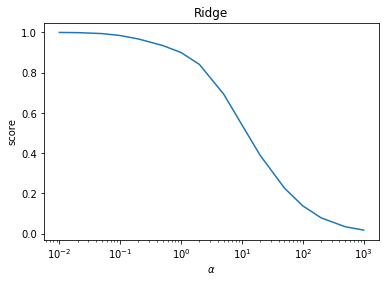

最佳 alpha : 0.01
海口:


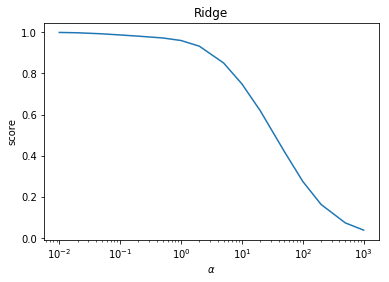

最佳 alpha : 0.01


In [31]:
print("三亚:")
Ridge_alpha(data_sanya.drop(['HP'],axis=1),data_sanya.drop(['HP'],axis=1),data_sanya['HP'],data_sanya['HP'])
print("海口:")
Ridge_alpha(data_haikou.drop(['HP'],axis=1),data_haikou.drop(['HP'],axis=1),data_haikou['HP'],data_haikou['HP'])